# Set Up Environment & Connect to Kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adesanyaayomide","key":"fadbad85fa5c5ab32de2ae331c63d314"}'}

In [ ]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


# Load and Explore Dataset

In [ ]:
!kaggle datasets download -d bwandowando/charlie-kirk-twitter-dataset


Dataset URL: https://www.kaggle.com/datasets/bwandowando/charlie-kirk-twitter-dataset
License(s): apache-2.0
  0% 0.00/68.3M [00:00<?, ?B/s]
100% 68.3M/68.3M [00:00<00:00, 2.30GB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("charlie-kirk-twitter-dataset.zip", 'r')
zip_ref.extractall("/content/")
zip_ref.close()

In [ ]:
import pandas as pd

df = pd.read_csv('/content/for_export_charlie_kirk.csv')
df.head()

,pseudo_id,text,retweetCount,replyCount,likeCount,quoteCount,viewCount,bookmarkCount,createdAt,lang,isReply,pseudo_conversationId,pseudo_inReplyToUsername,pseudo_author_userName,quoted_pseudo_id,author_isBlueVerified
0,335098644261566,CLEARLY WHY ROBINSO. KILLED CHARLIE KIRK\nChec...,0,0,0,0,0,0,2025-09-13 00:12:32+00:00,en,False,335098644261566,NaN,683805731746893,NaN,False
1,993437939265218,@695242549121979 Charlie Kirk didn’t deserve t...,0,0,0,0,0,0,2025-09-13 00:12:32+00:00,en,True,480787180308238,6.952425e+14,772698505691224,NaN,False
2,51368227215922,@396187379099632 @576794151260665 Post them he...,0,0,0,0,0,0,2025-09-13 00:12:32+00:00,en,True,687917658001246,3.961874e+14,62423919865749,NaN,False
3,554840011206382,@805230134765227 @718955815577256 So why post ...,0,0,0,0,0,0,2025-09-13 00:12:32+00:00,en,True,149526965769593,8.052301e+14,23702770839054,NaN,False
4,175456055441216,Here’s a reality of dealing with the death of ...,0,0,0,0,0,0,2025-09-13 00:12:31+00:00,en,False,175456055441216,NaN,686884260868392,NaN,True


In [ ]:
df.info()
df.isnull().sum()
df.describe()
df[['text', 'createdAt', 'likeCount', 'retweetCount']].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508954 entries, 0 to 508953
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   pseudo_id                 508954 non-null  int64  
 1   text                      508954 non-null  object 
 2   retweetCount              508954 non-null  int64  
 3   replyCount                508954 non-null  int64  
 4   likeCount                 508954 non-null  int64  
 5   quoteCount                508954 non-null  int64  
 6   viewCount                 508954 non-null  int64  
 7   bookmarkCount             508954 non-null  int64  
 8   createdAt                 508954 non-null  object 
 9   lang                      508954 non-null  object 
 10  isReply                   508954 non-null  bool   
 11  pseudo_conversationId     508954 non-null  int64  
 12  pseudo_inReplyToUsername  249092 non-null  float64
 13  pseudo_author_userName    508954 non-null  i

,text,createdAt,likeCount,retweetCount
0,CLEARLY WHY ROBINSO. KILLED CHARLIE KIRK\nChec...,2025-09-13 00:12:32+00:00,0,0
1,@695242549121979 Charlie Kirk didn’t deserve t...,2025-09-13 00:12:32+00:00,0,0
2,@396187379099632 @576794151260665 Post them he...,2025-09-13 00:12:32+00:00,0,0
3,@805230134765227 @718955815577256 So why post ...,2025-09-13 00:12:32+00:00,0,0
4,Here’s a reality of dealing with the death of ...,2025-09-13 00:12:31+00:00,0,0


# Create SQLite Database and Query

In [ ]:
import sqlite3
conn = sqlite3.connect('charlie_kirk.db')
df.to_sql('tweets', conn, index=False, if_exists='replace')


508954

Overview of Dataset

In [ ]:
pd.read_sql_query("""
SELECT COUNT(*) AS total_tweets,
       AVG(likeCount) AS avg_likes,
       AVG(retweetCount) AS avg_retweets
FROM tweets;
""", conn)

,total_tweets,avg_likes,avg_retweets
0,508954,83.488005,13.566753


Most Liked Tweets

In [ ]:
pd.read_sql_query("""
SELECT text, likeCount, retweetCount
FROM tweets
ORDER BY likeCount DESC
LIMIT 10;
""", conn)

,text,likeCount,retweetCount
0,#CharlieKirk https://t.co/wsIHayU6iz,452071,41305
1,On the antifragile Charlie Kirk influence: Ton...,339124,37097
2,Charlie Kirk’s shooter’s bullet casings had th...,289787,18716
3,LMAO SOMEONE SAID HIS FACE LOWERED TO HALF MAS...,253137,14071
4,"Charlie Kirk’s assassin Tyler Robinson, 22, ki...",251748,36807
5,🚨 BEAUTIFUL: Phoenix Air Traffic Control sent ...,243922,33972
6,Please share if you agree that the estate of C...,215597,43605
7,I wish I could like this a thousand times\n\nA...,208747,34606
8,JUST IN: The Charlie Kirk Show has gone live. ...,208005,21413
9,Charlie Kirk was loved by millions! https://t....,204210,33789


Monthly Engagement Trend

In [ ]:
pd.read_sql_query("""
SELECT strftime('%Y-%m', createdAt) AS month,
       COUNT(*) AS tweet_count,
       ROUND(AVG(likeCount),2) AS avg_likes,
       ROUND(AVG(retweetCount),2) AS avg_retweets
FROM tweets
GROUP BY month
ORDER BY month;
""", conn)

,month,tweet_count,avg_likes,avg_retweets
0,2025-09,508954,83.49,13.57


Tweets Containing Certain Keywords

In [ ]:
pd.read_sql_query("""
SELECT text, likeCount, retweetCount
FROM tweets
WHERE text LIKE '%America%' OR text LIKE '%Trump%'
ORDER BY likeCount DESC
LIMIT 5;
""", conn)

,text,likeCount,retweetCount
0,🚨 BEAUTIFUL: Phoenix Air Traffic Control sent ...,243922,33972
1,I wish I could like this a thousand times\n\nA...,208747,34606
2,Love this: The Charlie Kirk assassination is i...,178718,24235
3,EXPOSED: American spent all day doing her own ...,160294,41340
4,Can anyone tell me why the @925453347449944 Ho...,140888,15489


Comparing Retweet-To-Like Ratio

In [ ]:
pd.read_sql_query("""
SELECT text,
       likeCount,
       retweetCount,
       ROUND(CAST(retweetCount AS FLOAT)/likeCount, 2) AS retweet_ratio
FROM tweets
WHERE likeCount > 0
ORDER BY retweet_ratio DESC
LIMIT 10;
""", conn)

,text,likeCount,retweetCount,retweet_ratio
0,اب کہاں گیا آزادی اظہار یہ ان کا بنیادی حق ہے ...,1,10,10.0
1,Revelaron la identidad del joven y escurridizo...,1,8,8.0
2,More photos of person of interest in Charlie K...,1,8,8.0
3,@204914012788068 invokes the nation’s response...,2,14,7.0
4,All these black South Africans mourning Charli...,1,6,6.0
5,Charlie Kirk คือคนที่ทำมาหากินบน hate rhetoric...,1,6,6.0
6,"In a crack down on free speech rights, the Sta...",1,5,5.0
7,le meurtrier de #CharlieKirk est #anarchiste #...,1,5,5.0
8,"#BREAKING | Suspect Tyler Robinson, apprehend...",1,5,5.0
9,President Trump says with a “high degree of ce...,1,5,5.0


Average Likes by Time of Day

In [ ]:
pd.read_sql_query("""
SELECT strftime('%H', createdAt) AS hour,
       ROUND(AVG(likeCount),2) AS avg_likes
FROM tweets
GROUP BY hour
ORDER BY hour;
""", conn)

,hour,avg_likes
0,00,118.98
1,01,152.62
2,02,93.22
3,03,121.09
4,04,62.40
5,05,97.04
6,06,42.78
7,07,62.43
8,08,111.49
9,09,63.07


Longest Tweets and Their Engagement

In [ ]:
pd.read_sql_query("""
SELECT text,
       LENGTH(text) AS tweet_length,
       likeCount,
       retweetCount
FROM tweets
ORDER BY tweet_length DESC
LIMIT 10;
""", conn)

,text,tweet_length,likeCount,retweetCount
0,@859609316298312 CHARLIE KIRK: CES MARTYRS MOR...,24270,3,3
1,#DeepSearch #CharlieKirkshot #CharlieKirk #Inf...,22502,1,1
2,CHARLIE KIRK: THESE MARTYRS DIED FOR THE TRUTH...,21718,1,0
3,This article is the height of irony.\n\nThe ce...,19311,2522,282
4,"Charlie Kirk, The forces behind the genocides,...",16451,14,1
5,Estamos todos –todos los que somos personas de...,14357,6,4
6,"@266748431803130 \nCharlie Kirk, Right-Wing Fo...",13637,1,0
7,Dr. Shiva Ayyadurai @315283182322198 gave a t...,12419,0,0
8,📕Who Killed Charlie Kirk?📕\n\nAlexander Dugin\...,12302,6,2
9,📒Who Killed Charlie Kirk📒\n\nAlexander Dugin\n...,12078,0,0


# Visualize SQL Insights

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


 Hourly engagement


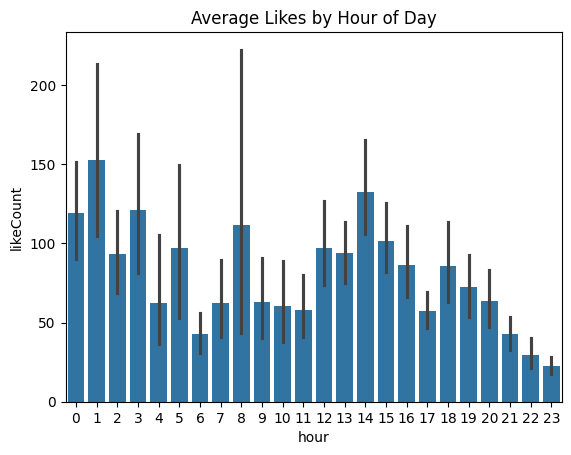

In [ ]:
df['hour'] = pd.to_datetime(df['createdAt']).dt.hour
sns.barplot(x='hour', y='likeCount', data=df)
plt.title('Average Likes by Hour of Day')
plt.show()

Retweets vs Likes


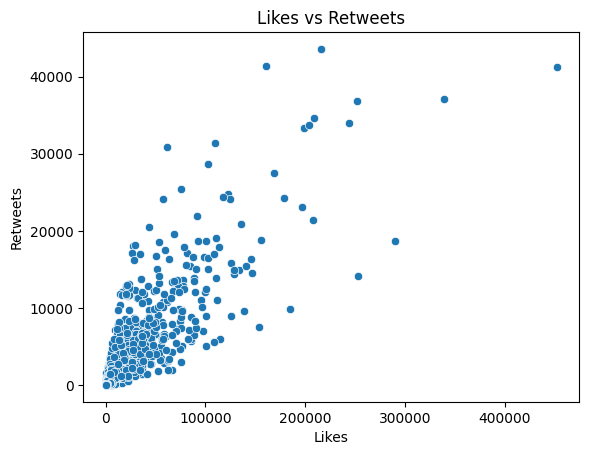

In [ ]:
sns.scatterplot(x='likeCount', y='retweetCount', data=df)
plt.title('Likes vs Retweets')
plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.show()

Word count vs Likes


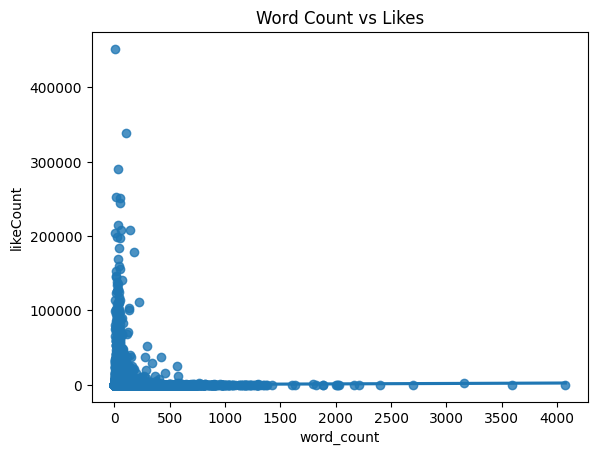

In [ ]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
sns.regplot(x='word_count', y='likeCount', data=df)
plt.title('Word Count vs Likes')
plt.show()

# Linear Algebra Integration: PCA on Engagement Metrics

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select numeric features
engagement = df[['retweetCount', 'likeCount', 'replyCount', 'quoteCount', 'viewCount']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(engagement)

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

df['PCA1'] = pca_result[:,0]
df['PCA2'] = pca_result[:,1]

print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.66073588 0.17731184]


Visualize PCA (Tweet Engagement Clusters)

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', alpha=0.5)
plt.title('PCA Visualization of Tweet Engagement Metrics')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


In [ ]:
!git clone https://github.com/Miideh/charlie-kirk-sql-analysis.git


Cloning into 'charlie-kirk-sql-analysis'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), done.


In [ ]:
!mv charlie_kirk_sql_analysis.ipynb charlie-kirk-sql-analysis/


mv: cannot stat 'charlie_kirk_sql_analysis.ipynb': No such file or directory


In [ ]:
%cd charlie-kirk-sql-analysis
!git config --global user.email "your-email@example.com"
!git config --global user.name "Your Name"

!git add .
!git commit -m "Initial analysis and SQL exploration on Charlie Kirk dataset"
!git push https://github.com/your-username/charlie-kirk-sql-analysis.git
